# Heart Diseage
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Importación de datos

In [3]:
df = pd.read_csv('heart.csv')

## Exploración de datos

In [4]:
print('Número de instancias: ', len(df))
print('Número de atributos: ', len(df.columns))

Número de instancias:  1025
Número de atributos:  14


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns

print('Atributos numéricos: ', len(numeric))
print('Atributos categóricos: ', len(categorical))

Atributos numéricos:  14
Atributos categóricos:  0


### Distribución de la clase

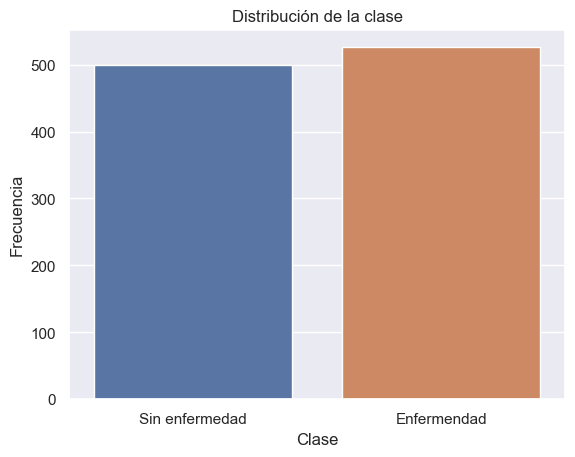

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="target", data=df)
ax.set_xticklabels(['Sin enfermedad', 'Enfermendad'])
plt.title('Distribución de la clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

### Moda de cada atributo categorico

In [9]:
for col in categorical:
    print('Moda de ', col, ': ', df[col].mode()[0])

### Media, rango y desviación estándar para cada atributo numérico

In [29]:
stats = pd.DataFrame(columns=['media', 'desdiación estándar', 'rango'])
for col in numeric:
    stats.loc[col] = [df[col].mean(), df[col].std(), df[col].max() - df[col].min()]

pd.set_option("display.precision", 2)
stats.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
media,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
desdiación estándar,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
rango,48.00,1.00,3.00,106.00,438.00,1.00,2.00,131.00,1.00,6.20,2.00,4.00,3.00,1.00


### Valores faltantes de cada atributo

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Valores atípicos

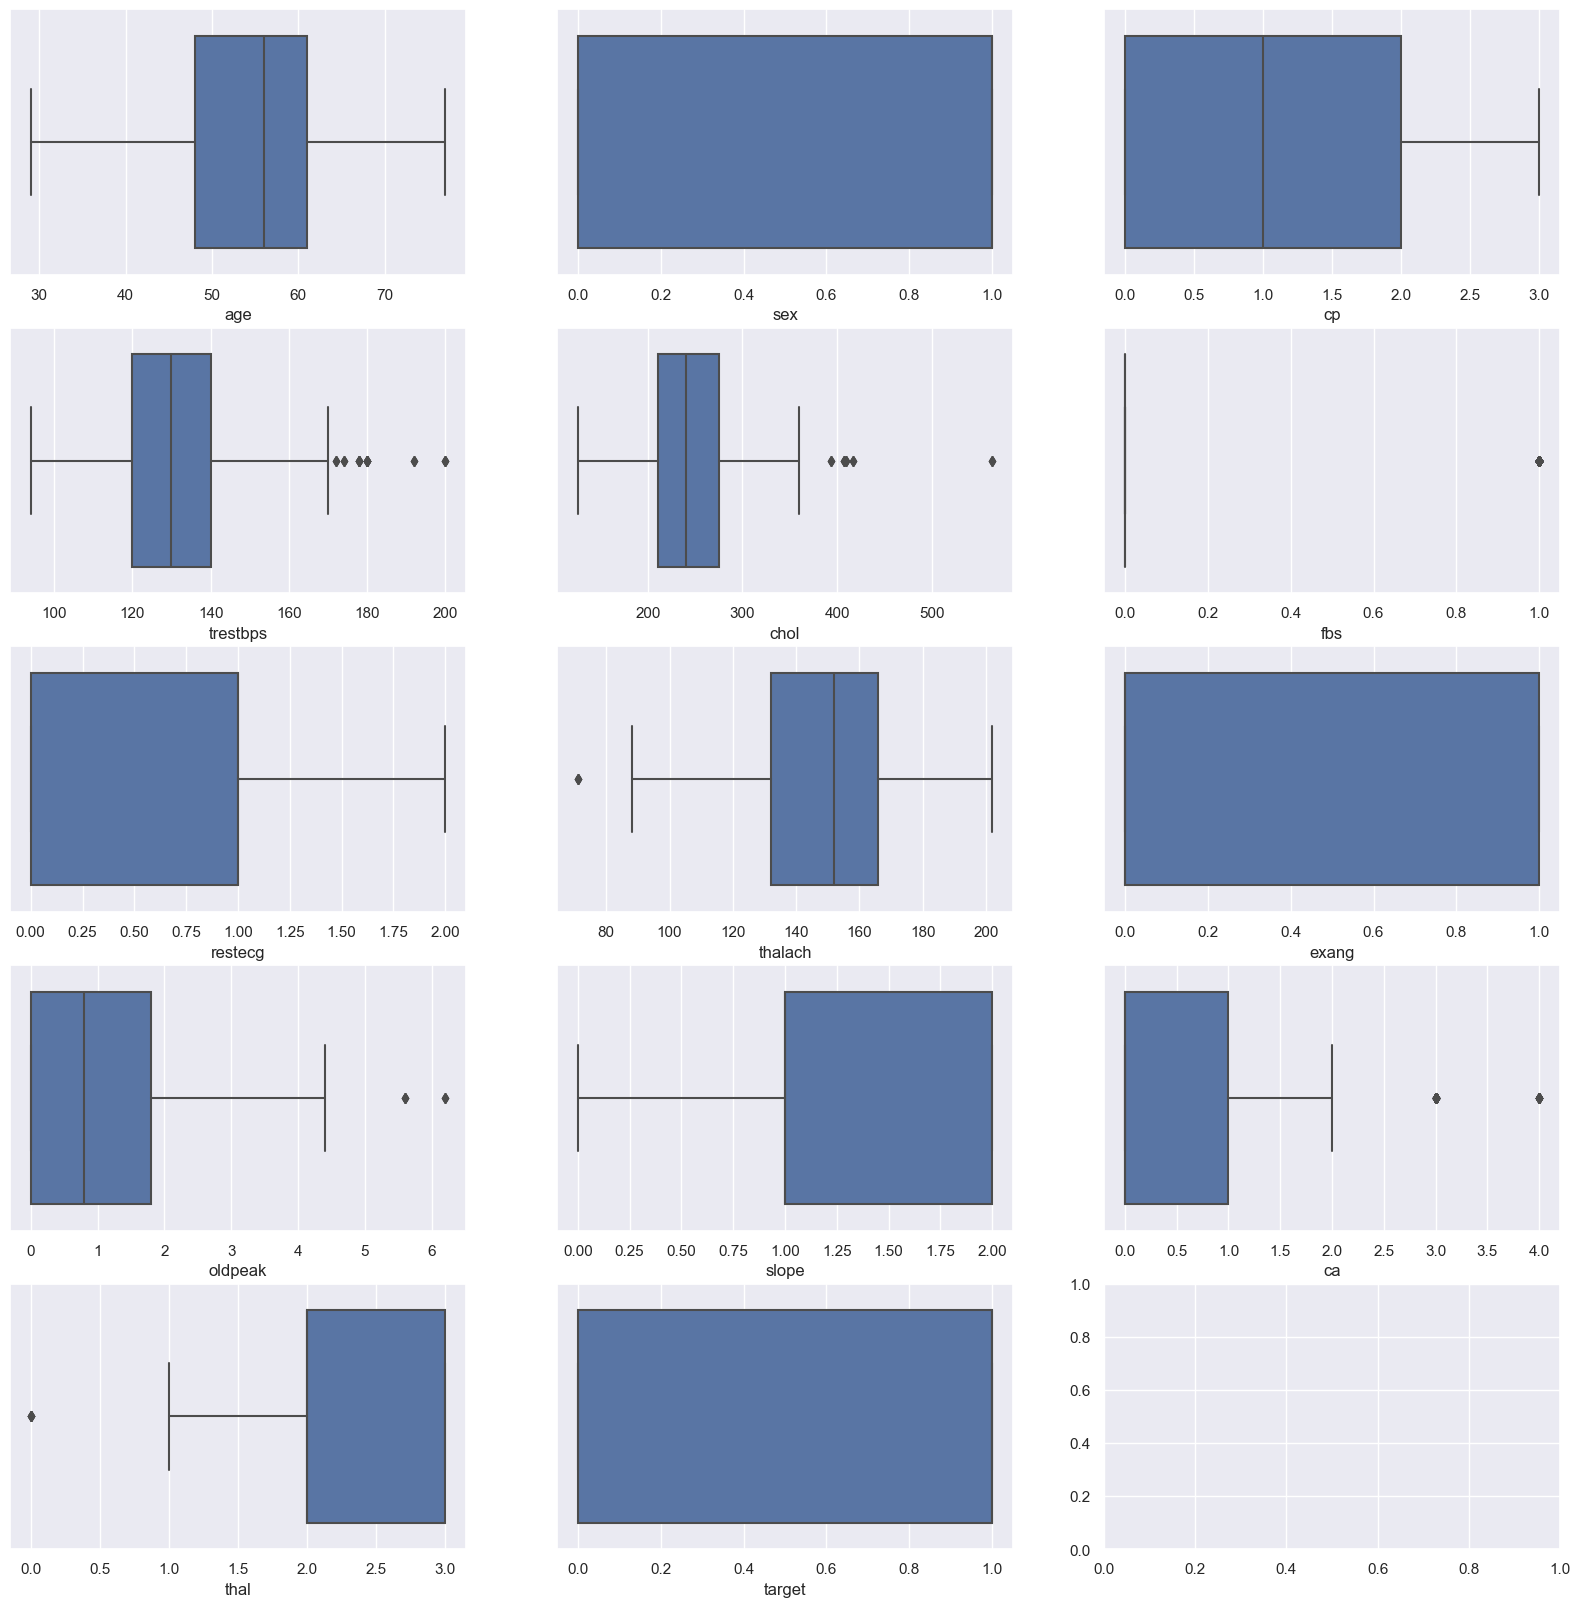

In [13]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
for i, col in enumerate(numeric):
    sns.boxplot(x=df[col], ax=ax[i//3, i%3])
plt.show()

 ### Convertir datos númericos a categoricos

In [14]:
df_cat = df.copy()

# sex 1 = male; 0 = female
df_cat['sex'] = df_cat['sex'].map({1: 'Hombre', 0: 'Mujer'})

# cp: chest pain type
df_cat['cp'] = df_cat['cp'].map({0: 'Angina típica', 1: 'Angina atípica', 2: 'Dolor no cardíaco', 3: 'Asintomático'})

# fbs: fasting blood sugar > 120 mg/dl
df_cat['fbs'] = df_cat['fbs'].map({1: 'Si', 0: 'No'})

# restecg: resting electrocardiographic results
df_cat['restecg'] = df_cat['restecg'].map({0: 'Normal', 1: 'Anormalidad de la onda ST-T', 2: 'Hipertrofia ventricular izquierda probable o definitiva'})

# exang: exercise induced angina
df_cat['exang'] = df_cat['exang'].map({1: 'Si', 0: 'No'})

# slope: the slope of the peak exercise ST segment
df_cat['slope'] = df_cat['slope'].map({0: 'Ascendente', 1: 'Plano', 2: 'Descendente'})

# thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
df_cat['thal'] = df_cat['thal'].map({1: 'Normal', 2: 'Defecto fijo', 3: 'Defecto reversible'})

# target: 0 = no disease; 1 = disease
df_cat['target'] = df_cat['target'].map({1: 'Enfermedad', 0: 'Sin enfermedad'})

df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Hombre,Angina típica,125,212,No,Anormalidad de la onda ST-T,168,No,1.0,Descendente,2,Defecto reversible,Sin enfermedad
1,53,Hombre,Angina típica,140,203,Si,Normal,155,Si,3.1,Ascendente,0,Defecto reversible,Sin enfermedad
2,70,Hombre,Angina típica,145,174,No,Anormalidad de la onda ST-T,125,Si,2.6,Ascendente,0,Defecto reversible,Sin enfermedad
3,61,Hombre,Angina típica,148,203,No,Anormalidad de la onda ST-T,161,No,0.0,Descendente,1,Defecto reversible,Sin enfermedad
4,62,Mujer,Angina típica,138,294,Si,Anormalidad de la onda ST-T,106,No,1.9,Plano,3,Defecto fijo,Sin enfermedad


### Corrección de valores atípicos

In [15]:
df_corr = df.copy()
## Calculo de los cuartiles
Q1 = df_corr.quantile(0.25)
Q3 = df_corr.quantile(0.75)
IQR = Q3 - Q1
## Eliminación de los valores atípicos
df_corr = df_corr[~((df_corr < (Q1 - 1.5 * IQR)) |(df_corr > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Número de instancias: ', len(df_corr))
print('Número de atributos: ', len(df_corr.columns))

df_corr.head()

Número de instancias:  769
Número de atributos:  14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


## Matriz de covarianza

<Axes: >

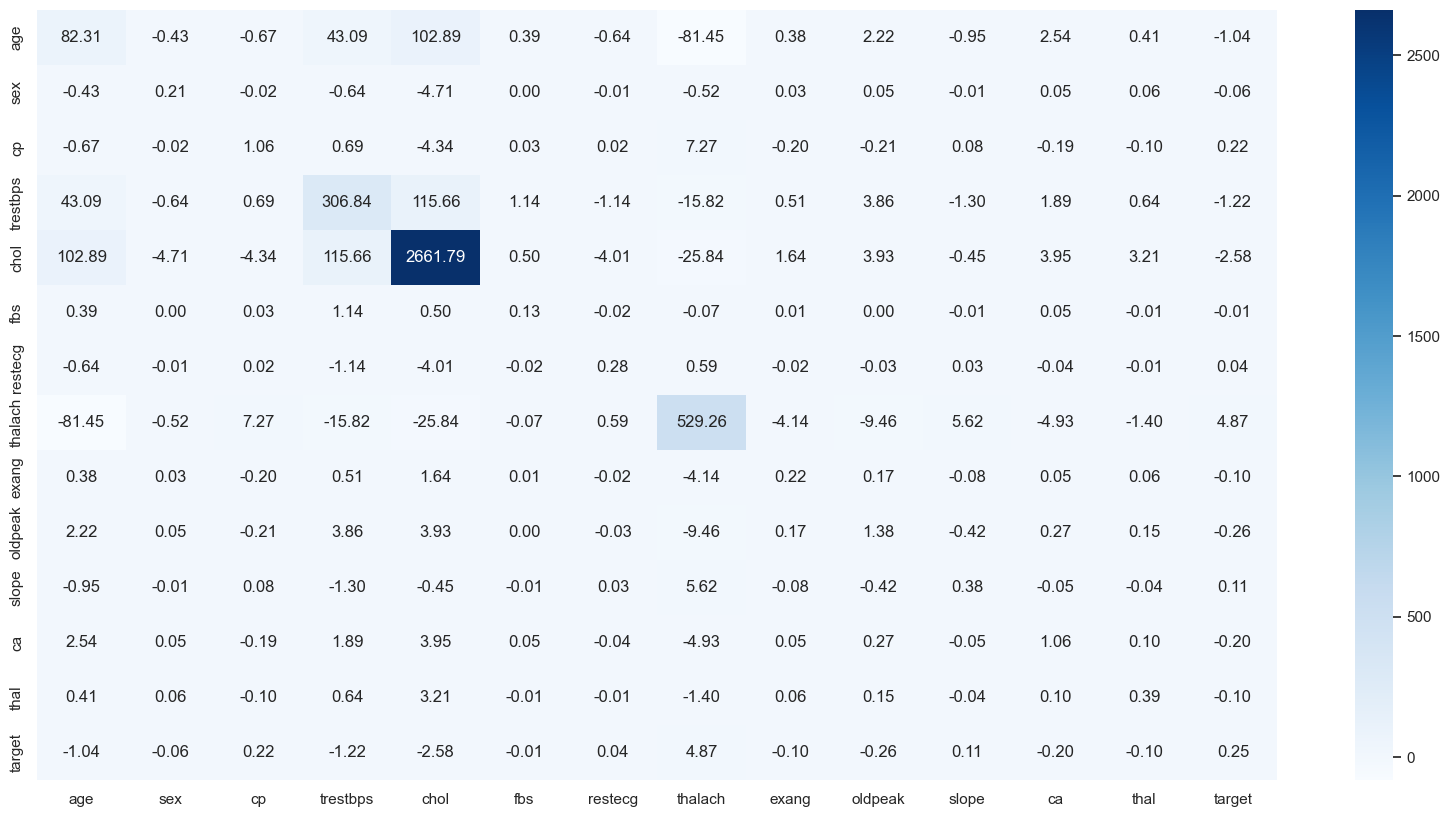

In [16]:
cov = df.cov()
plt.figure(figsize=(20, 10))
sns.heatmap(cov, annot=True, cmap='Blues', fmt='.2f')

## Pearson

<Axes: >

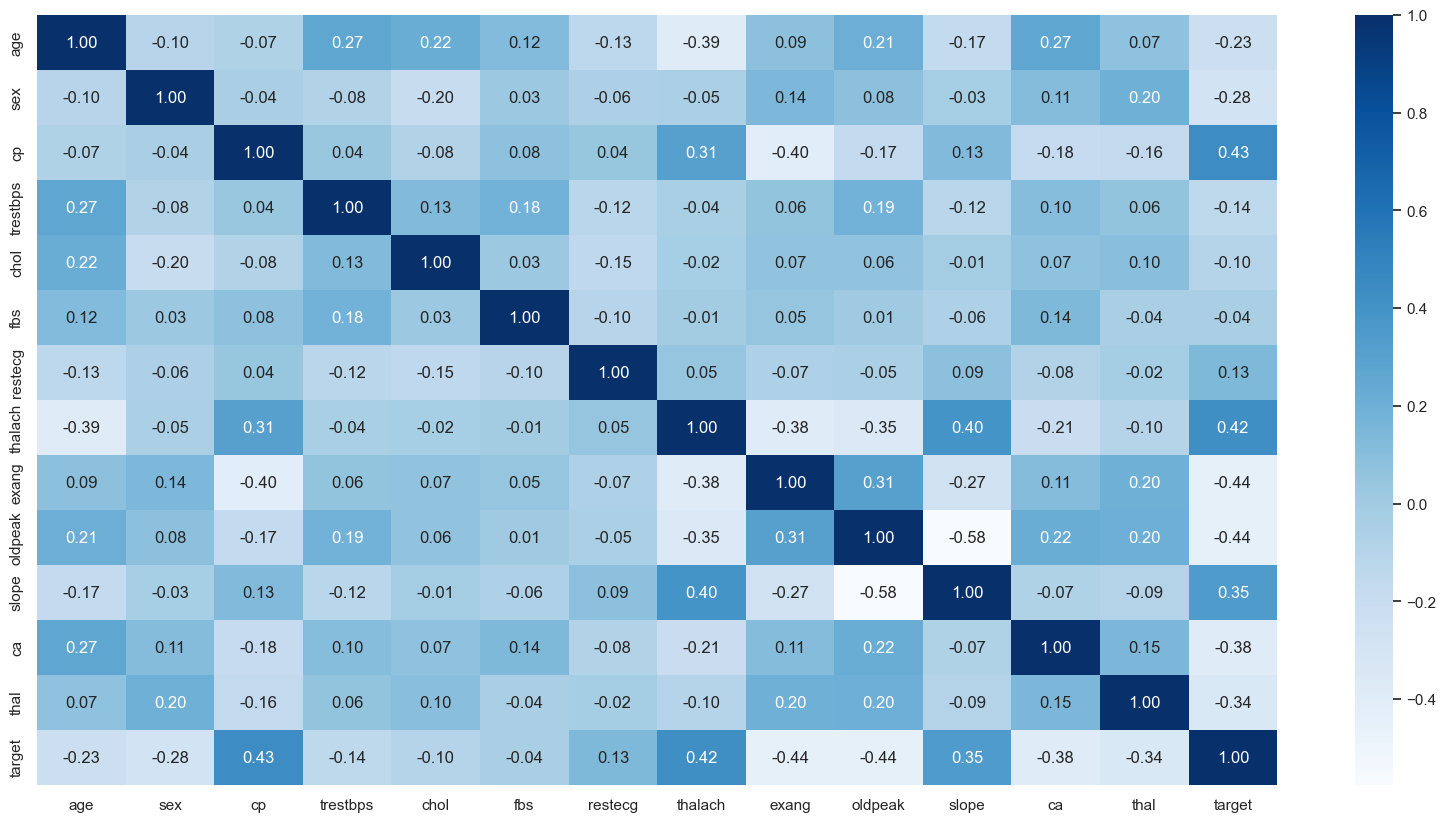

In [17]:
pearson = df.corr(method='pearson')
plt.figure(figsize=(20, 10))
sns.heatmap(pearson, annot=True, cmap='Blues', fmt='.2f')

### Correlación entre atributos

<Axes: >

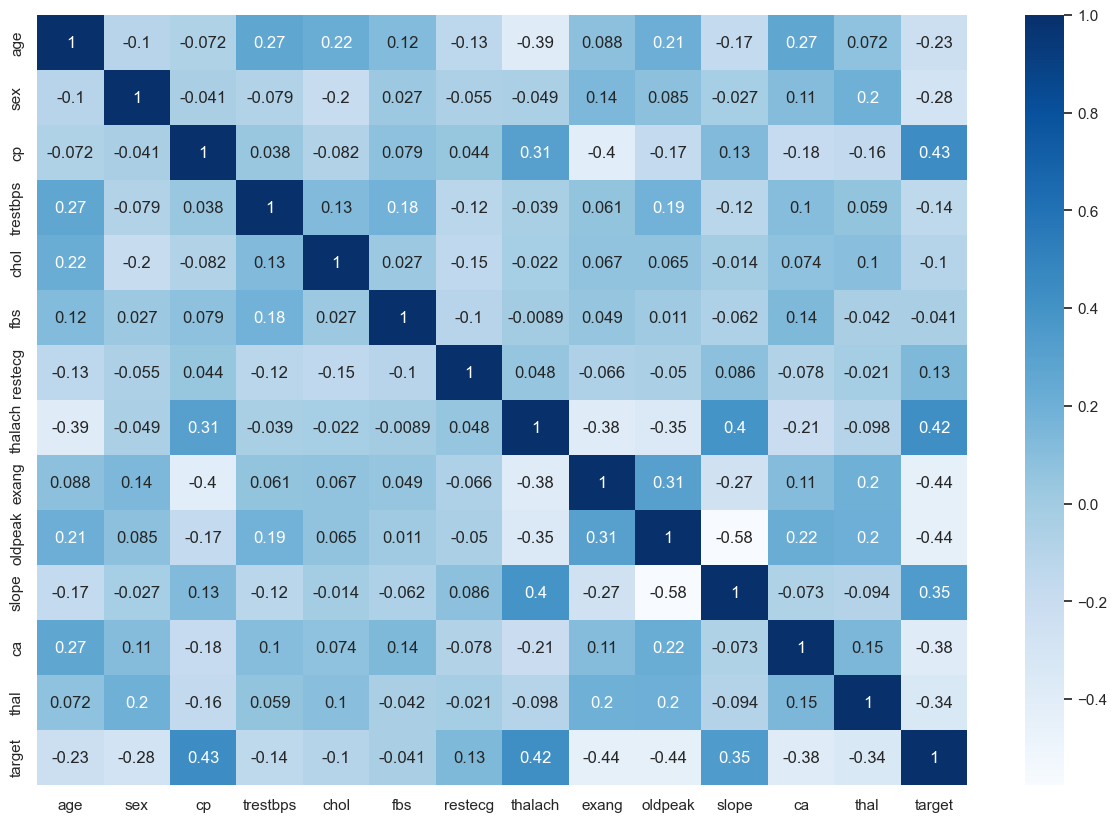

In [18]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Blues')

## Modelamiento predictivo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [20]:
X = df.drop('target', axis=1)
y = df['target']

### División de los datos en entrenamiento y prueba

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Entrenamiento del modelo

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\Projects\heart-disease\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluación del modelo

In [23]:
y_pred = model.predict(X_test)

### Métricas de evaluación

#### Comparación de valores reales y predichos

In [24]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicho': y_pred})

df_pred.head()

,Actual,Predicho
181,1,1
501,1,1
1002,0,0
702,1,1
16,1,1


#### Matriz de confusión

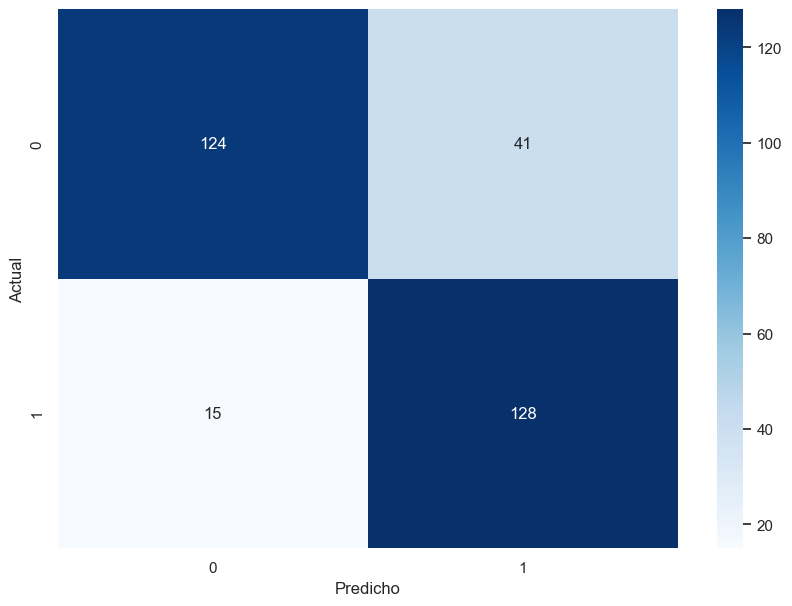

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()

#### Metricas de evaluación del modelo

In [26]:
print('Exactitud: ', accuracy_score(y_test, y_pred))
print('Precisión: ', precision_score(y_test, y_pred))
print('Sensibilidad: ', recall_score(y_test, y_pred))
print('Especificidad: ', recall_score(y_test, y_pred, pos_label=0))
print('Puntaje F1: ', f1_score(y_test, y_pred))

Exactitud:  0.8181818181818182
Precisión:  0.757396449704142
Sensibilidad:  0.8951048951048951
Especificidad:  0.7515151515151515
Puntaje F1:  0.8205128205128205


##### ¿Cuántos falsos positivos tiene el modelo resultante? cuántos falsos negativos?

In [27]:
# Falsos positivos
fp = cm[0][1]
# Falsos negativos
fn = cm[1][0]

print('Falsos positivos: ', fp)
print('Falsos negativos: ', fn)

Falsos positivos:  41
Falsos negativos:  15


##### Interpretación de las métricas

In [28]:
print(f'Tenemos que el modelo obtuvo un pocentaje de exactitud del 80%, lo cual es un buen resultado, sin embargo, al observar la matriz de confusión, podemos ver que el modelo predijo {fp} falsos positivos y {fn} falsos negativos, lo cual es un resultado no tan bueno, ya que el modelo predijo que {fp} personas no tenían enfermedad cardíaca cuando en realidad si la tenían, y predijo que {fn} personas tenían enfermedad cardíaca cuando en realidad no la tenían. Esto puede ser un problema, ya que si el modelo se utiliza para predecir si una persona tiene o no enfermedad cardíaca, puede dar un resultado erróneo, lo cual puede ser peligroso para la persona')

Tenemos que el modelo obtuvo un pocentaje de exactitud del 80%, lo cual es un buen resultado, sin embargo, al observar la matriz de confusión, podemos ver que el modelo predijo 41 falsos positivos y 15 falsos negativos, lo cual es un resultado no tan bueno, ya que el modelo predijo que 41 personas no tenían enfermedad cardíaca cuando en realidad si la tenían, y predijo que 15 personas tenían enfermedad cardíaca cuando en realidad no la tenían. Esto puede ser un problema, ya que si el modelo se utiliza para predecir si una persona tiene o no enfermedad cardíaca, puede dar un resultado erróneo, lo cual puede ser peligroso para la persona
